In [1]:
import os
import factorloader, utils
import stockdownload as dl
import evaluationtools as evaluate
import factorcombiner as cb
import numpy as np
import seaborn as sns
import pandas as pd

# 载入因子库

## 下载数据

In [2]:
code = "000905"
start = '2020-01-02'
end = '2023-07-31'
data = dl.download_domestic_index_data(code, start, end)
data

date     open    close     high      low     volume      turnover  \
0   2020-01-02  5306.67  5366.14  5374.91  5288.17  145894405  1.368138e+11   
1   2020-01-03  5376.03  5380.64  5395.26  5351.80  128452022  1.221997e+11   
2   2020-01-06  5365.22  5434.85  5481.55  5355.02  159587415  1.581909e+11   
3   2020-01-07  5441.90  5499.84  5499.84  5440.69  144142723  1.421942e+11   
4   2020-01-08  5481.98  5423.80  5500.16  5409.57  155406848  1.498381e+11   
..         ...      ...      ...      ...      ...        ...           ...   
862 2023-07-25  5976.97  6016.63  6016.75  5971.73  131896392  1.457328e+11   
863 2023-07-26  6014.76  6001.54  6015.58  5984.39  121825219  1.205474e+11   
864 2023-07-27  5998.85  5961.18  6017.67  5952.89  123000825  1.172721e+11   
865 2023-07-28  5945.91  6043.24  6049.76  5932.06  163171871  1.491475e+11   
866 2023-07-31  6059.11  6088.24  6133.72  6059.11  186551103  1.795957e+11   

     amplitude  quote change  change amount  turnover rate  symbol  
0         1.65          1.87          98.48           1.26  000905  
1         0.81          0.27          14.50           1.11  000905  
2         2.35          1.01          54.21           1.38  000905  
3         1.09          1.20          64.99           1.25  000905  
4         1.65         -1.38         -76.04           1.34  000905  
..         ...           ...            ...            ...     ...  
862       0.76          1.69          99.92           1.14  000905  
863       0.52         -0.25         -15.09           1.05  000905  
864       1.08         -0.67         -40.36           1.06  000905  
865       1.97          1.38          82.06           1.41  000905  
866       1.23          0.74          45.00           1.61  000905  

[867 rows x 12 columns]

In [3]:
# current working folder
CurrentFolder = os.getcwd()
# set files save paths
Factors_Folder_Path = CurrentFolder + '\\factorloader\\data\\' + str(code) + '\\'
Weights_Save_Path =  CurrentFolder + '\\factorcombiner\\data\\' + str(code) + '\\'
Factorsconcat_Name = 'factorsconcat.csv' 
Weight_Save_Name = 'weight.csv'
if not os.path.isdir(Factors_Folder_Path):
    os.makedirs(Factors_Folder_Path)
if not os.path.isdir(Weights_Save_Path):
    os.makedirs(Weights_Save_Path)

## 导入单因子

In [4]:
# check if factors currently exist
head = (start == str(pd.read_csv(Factors_Folder_Path + 'augur_0001.csv').iloc[0, 1]))
tail = (end == str(pd.read_csv(Factors_Folder_Path + 'augur_0001.csv').iloc[-1, 1]))
if not (head and tail):
    factorloader.all_main(code, start, end)

Factory augur_0001 time 1.0132062435150146
Factory augur_0002 time 0.005987405776977539
Factory augur_0003 time 0.005983829498291016
Factory augur_0004 time 0.8062784671783447
Factory augur_0005 time 0.3519473075866699
Factory augur_0006 time 0.7339951992034912
Factory augur_0007 time 0.7667770385742188
Factory augur_0008 time 0.6669116020202637
Factory augur_0009 time 0.7142174243927002
Factory augur_0010 time 0.5798091888427734
Factory augur_0011 time 0.6241035461425781
Factory augur_0012 time 0.41009020805358887
Factory augur_0013 time 0.35414791107177734
Factory augur_0014 time 0.478471040725708
Factory augur_0015 time 0.31777381896972656
Factory augur_0016 time 0.30408716201782227
Factory augur_0017 time 0.30756330490112305
Factory augur_0018 time 0.2909255027770996
Factory augur_0019 time 0.3167591094970703
Factory augur_0020 time 0.676682710647583
Factory augur_0021 time 0.4104633331298828
Factory augur_0022 time 0.565208911895752
Factory augur_0023 time 0.6046676635742188
Facto

Factory augur_0037 time 4.251417875289917
Factory augur_0038 time 0.44823503494262695
Factory augur_0039 time 0.375760555267334
Factory augur_0040 time 0.35170984268188477
Factory augur_0042 time 2.250012159347534
Factory augur_0043 time 6.109958648681641
Factory augur_0044 time 5.715935707092285


100%|██████████| 804/804 [01:44<00:00,  7.73it/s]


[{'t1': 737426.0, 't2': 737524.0, 'p2': 8.579690881474011, 'res': [{'tc_d': '2032-03-14', 'tc': 741881.7704093668, 'm': 0.017612745265198786, 'w': 11.028643247981556, 'a': -98663.32936000671, 'b': 85109.56544018391, 'c': -136.10745424852104, 'c1': -135.55455562851586, 'c2': 12.255674211109168, 't1_d': '2020-01-02', 't2_d': '2020-04-09', 't1': 737426.0, 't2': 737524.0, 'O': 0.03903604146314056, 'D': 0.9986226851320467}, {'tc_d': '2020-04-09', 'tc': 737524.4977431122, 'm': 1.2004741588563037, 'w': 4.419851597413375, 'a': 8.535524475369092, 'b': 0.0008664723190420895, 'c': -0.0007048460770541777, 'c1': -0.0007044885075191027, 'c2': -2.2448499107313275e-05, 't1_d': '2020-01-09', 't2_d': '2020-04-09', 't1': 737433.0, 't2': 737524.0, 'O': 3.6677323568913334, 'D': 0.33389163165679775}, {'tc_d': '2053-08-20', 'tc': 749710.8687968185, 'm': 0.9128168903525051, 'w': 7.245888419411054, 'a': -79546.55407854101, 'b': 14.974612369222996, 'c': -1.8719643206341379, 'c1': -1.5998651467033205, 'c2': -0.9

## 将预处理后的单因子组合成一张表

In [5]:
factor_date = data['date'][30:].reset_index()['date']
def pre(factor):
    # shift factor values to avoid using future data
    if len(factor.iloc[:, 1]):
        factor = factor.shift(1).fillna(factor.iloc[0, 1])
    
    # normalize first then standardize, its order changes new factor a lot
    f = utils.normalize(factor['factor'])
    f = utils.standardize(f)
    factor['factor'] = f

    # the initial factor always does not change or stays at 0 in the start,
    # to clean data, we pop the first 30 days value in the initial factor
    return factor.iloc[30:,:].reset_index(drop=True)

In [6]:
# save factors file paths list
os.chdir(Factors_Folder_Path)
file_list = os.listdir()
os.chdir(CurrentFolder)

# concat intialization: save the first factor
df = pd.read_csv(Factors_Folder_Path + file_list[0]).iloc[:, 1:3]
df = pre(df)
df = df.rename(columns={'factor': 'augur_001'})
df = df.iloc[:, 1]
df.to_csv(Weights_Save_Path +
          Factorsconcat_Name, encoding="utf_8_sig", index=False)

# concat other factors
file = [df]
for i in range(1, len(file_list)):
    f = pd.read_csv(Factors_Folder_Path + file_list[i]).iloc[:, 1:3]
    factor = pre(f)
    factor = factor.rename(columns={'factor': 'augur_00{}'.format(i+1)})
    if len(factor) == len(file[0]) and i != 40 and i != 43:
        file.append(factor.iloc[:, 1])
factor_combined = pd.concat(file, axis=1)
factor_combined.to_csv(Weights_Save_Path + Factorsconcat_Name,
                       encoding="utf_8_sig", index=False)
factor_combined

d:\nri_research\ts-market-timing\utils\preprocessing.py:73: RuntimeWarning: invalid value encountered in divide
  result = (np.array(s) - np.array(rolling_min)) / (np.array(rolling_max) - np.array(rolling_min))
d:\nri_research\ts-market-timing\utils\preprocessing.py:50: RuntimeWarning: invalid value encountered in divide
  result = (np.array(s) - np.array(rolling_mean)) / np.array(rolling_std)
d:\nri_research\ts-market-timing\utils\preprocessing.py:73: RuntimeWarning: invalid value encountered in divide
  result = (np.array(s) - np.array(rolling_min)) / (np.array(rolling_max) - np.array(rolling_min))
d:\nri_research\ts-market-timing\utils\preprocessing.py:73: RuntimeWarning: invalid value encountered in divide
  result = (np.array(s) - np.array(rolling_min)) / (np.array(rolling_max) - np.array(rolling_min))
d:\nri_research\ts-market-timing\utils\preprocessing.py:73: RuntimeWarning: invalid value encountered in divide
  result = (np.array(s) - np.array(rolling_min)) / (np.array(rolling_

augur_001  augur_002  augur_003  augur_004  augur_005  augur_006  \
0     0.447214   0.145334   0.145480   1.150656   0.842910  -3.271404   
1     0.408248   0.080895   0.081031   1.132225   0.819249  -2.038458   
2     0.377964   0.083581   0.083716   1.003806   0.797493  -1.823935   
3     0.242185   0.567907   0.568069   0.924984   0.777400  -1.547834   
4    -2.087370  -1.040087  -1.040125   0.623622   0.284229   0.512716   
..         ...        ...        ...        ...        ...        ...   
832   0.729255   0.104708   0.104721  -0.685114  -1.235548   0.452780   
833  -1.224115   1.170866   1.170875   3.068207   1.062546  -3.975687   
834  -0.978726  -0.408925  -0.408913   2.904124   0.125006  -2.667425   
835  -0.181492  -1.167328  -1.167315   2.657207  -1.011047  -0.141603   
836  -1.602488   1.981392   1.981388   3.959053   0.283865  -0.443497   

     augur_007  augur_008  augur_009  augur_0010  augur_0011  augur_0012  \
0     0.000000   1.202537   0.795223    0.045925    0.798434    0.877537   
1     0.000000   1.054304   0.587321    0.208255    1.249165    1.053846   
2     0.000000   1.047264   0.313255    0.219667    1.470944    1.104339   
3     0.000000   1.086238   0.246737    0.613225    1.171484    0.989674   
4     0.000000   0.864493   0.857678   -0.279208    0.592403    0.819271   
..         ...        ...        ...         ...         ...         ...   
832   0.258886   2.275926  -0.686059    0.221918    2.079226    0.880575   
833   0.258886   2.002703   2.893959    0.749423    2.114296    1.549779   
834   0.258886   2.322300   3.673512    1.505915    2.743107    1.422632   
835   0.258886   2.242606   3.220620    1.390991    2.185693    1.198012   
836   0.258886   2.664950   3.821457    2.342617    1.806611    1.366977   

     augur_0014  augur_0015  augur_0019  augur_0042  augur_0043  augur_0045  
0      1.188034    0.984961    0.491014    0.712781    0.590481    1.199383  
1      1.093449    1.102556    0.614854    0.106915    0.483509    1.151675  
2      1.118424    1.316811    0.517237    0.634380    0.478431    1.109293  
3      0.797082    1.261900    0.193605    0.648014    0.258638    1.071314  
4      0.862278    1.142449    0.219444    0.658354   -0.511247    1.024295  
..          ...         ...         ...         ...         ...         ...  
832    1.287617    1.242818    1.260418   -1.336815    0.087743   -1.165022  
833    1.533178    1.588235    1.616167   -0.146236   -0.148410    5.076450  
834    1.828639    1.514603    1.343423   -0.021488    2.150370    4.499727  
835    1.345060    1.110337    1.207468    1.767150   -0.638247    3.817508  
836    1.551788    1.345361    1.320136    0.143544   -1.174823    3.822951  

[837 rows x 18 columns]

### 因子相关性可视化

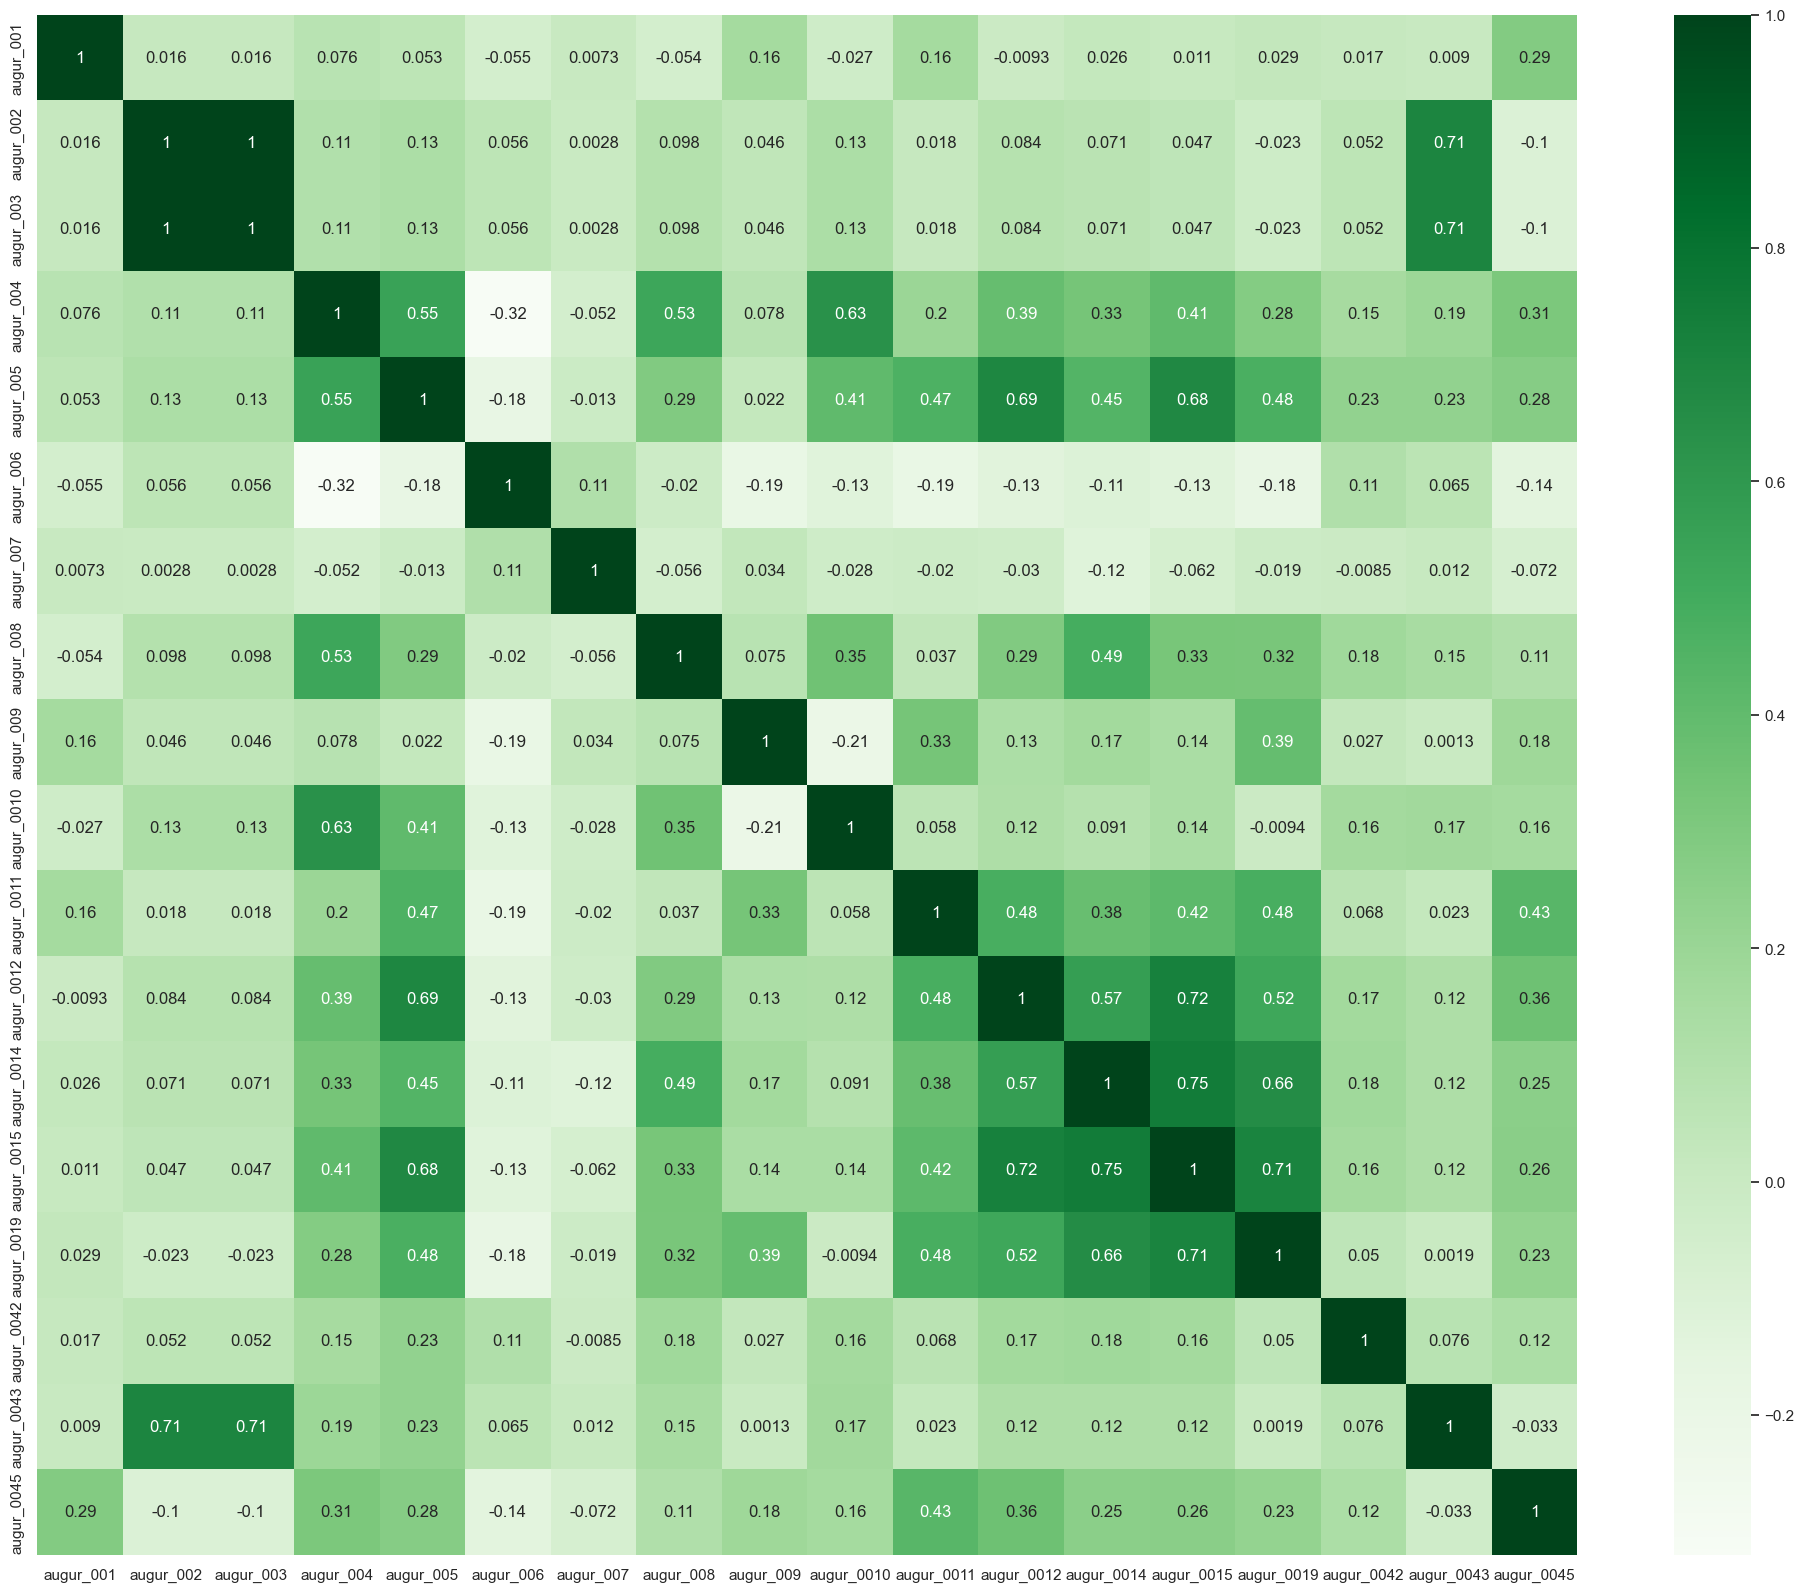

In [7]:
corr = factor_combined.corr()
sns.set(rc = {'figure.figsize':(25,20)})
_ = sns.heatmap(corr, cmap="Greens", square=True, annot=True)

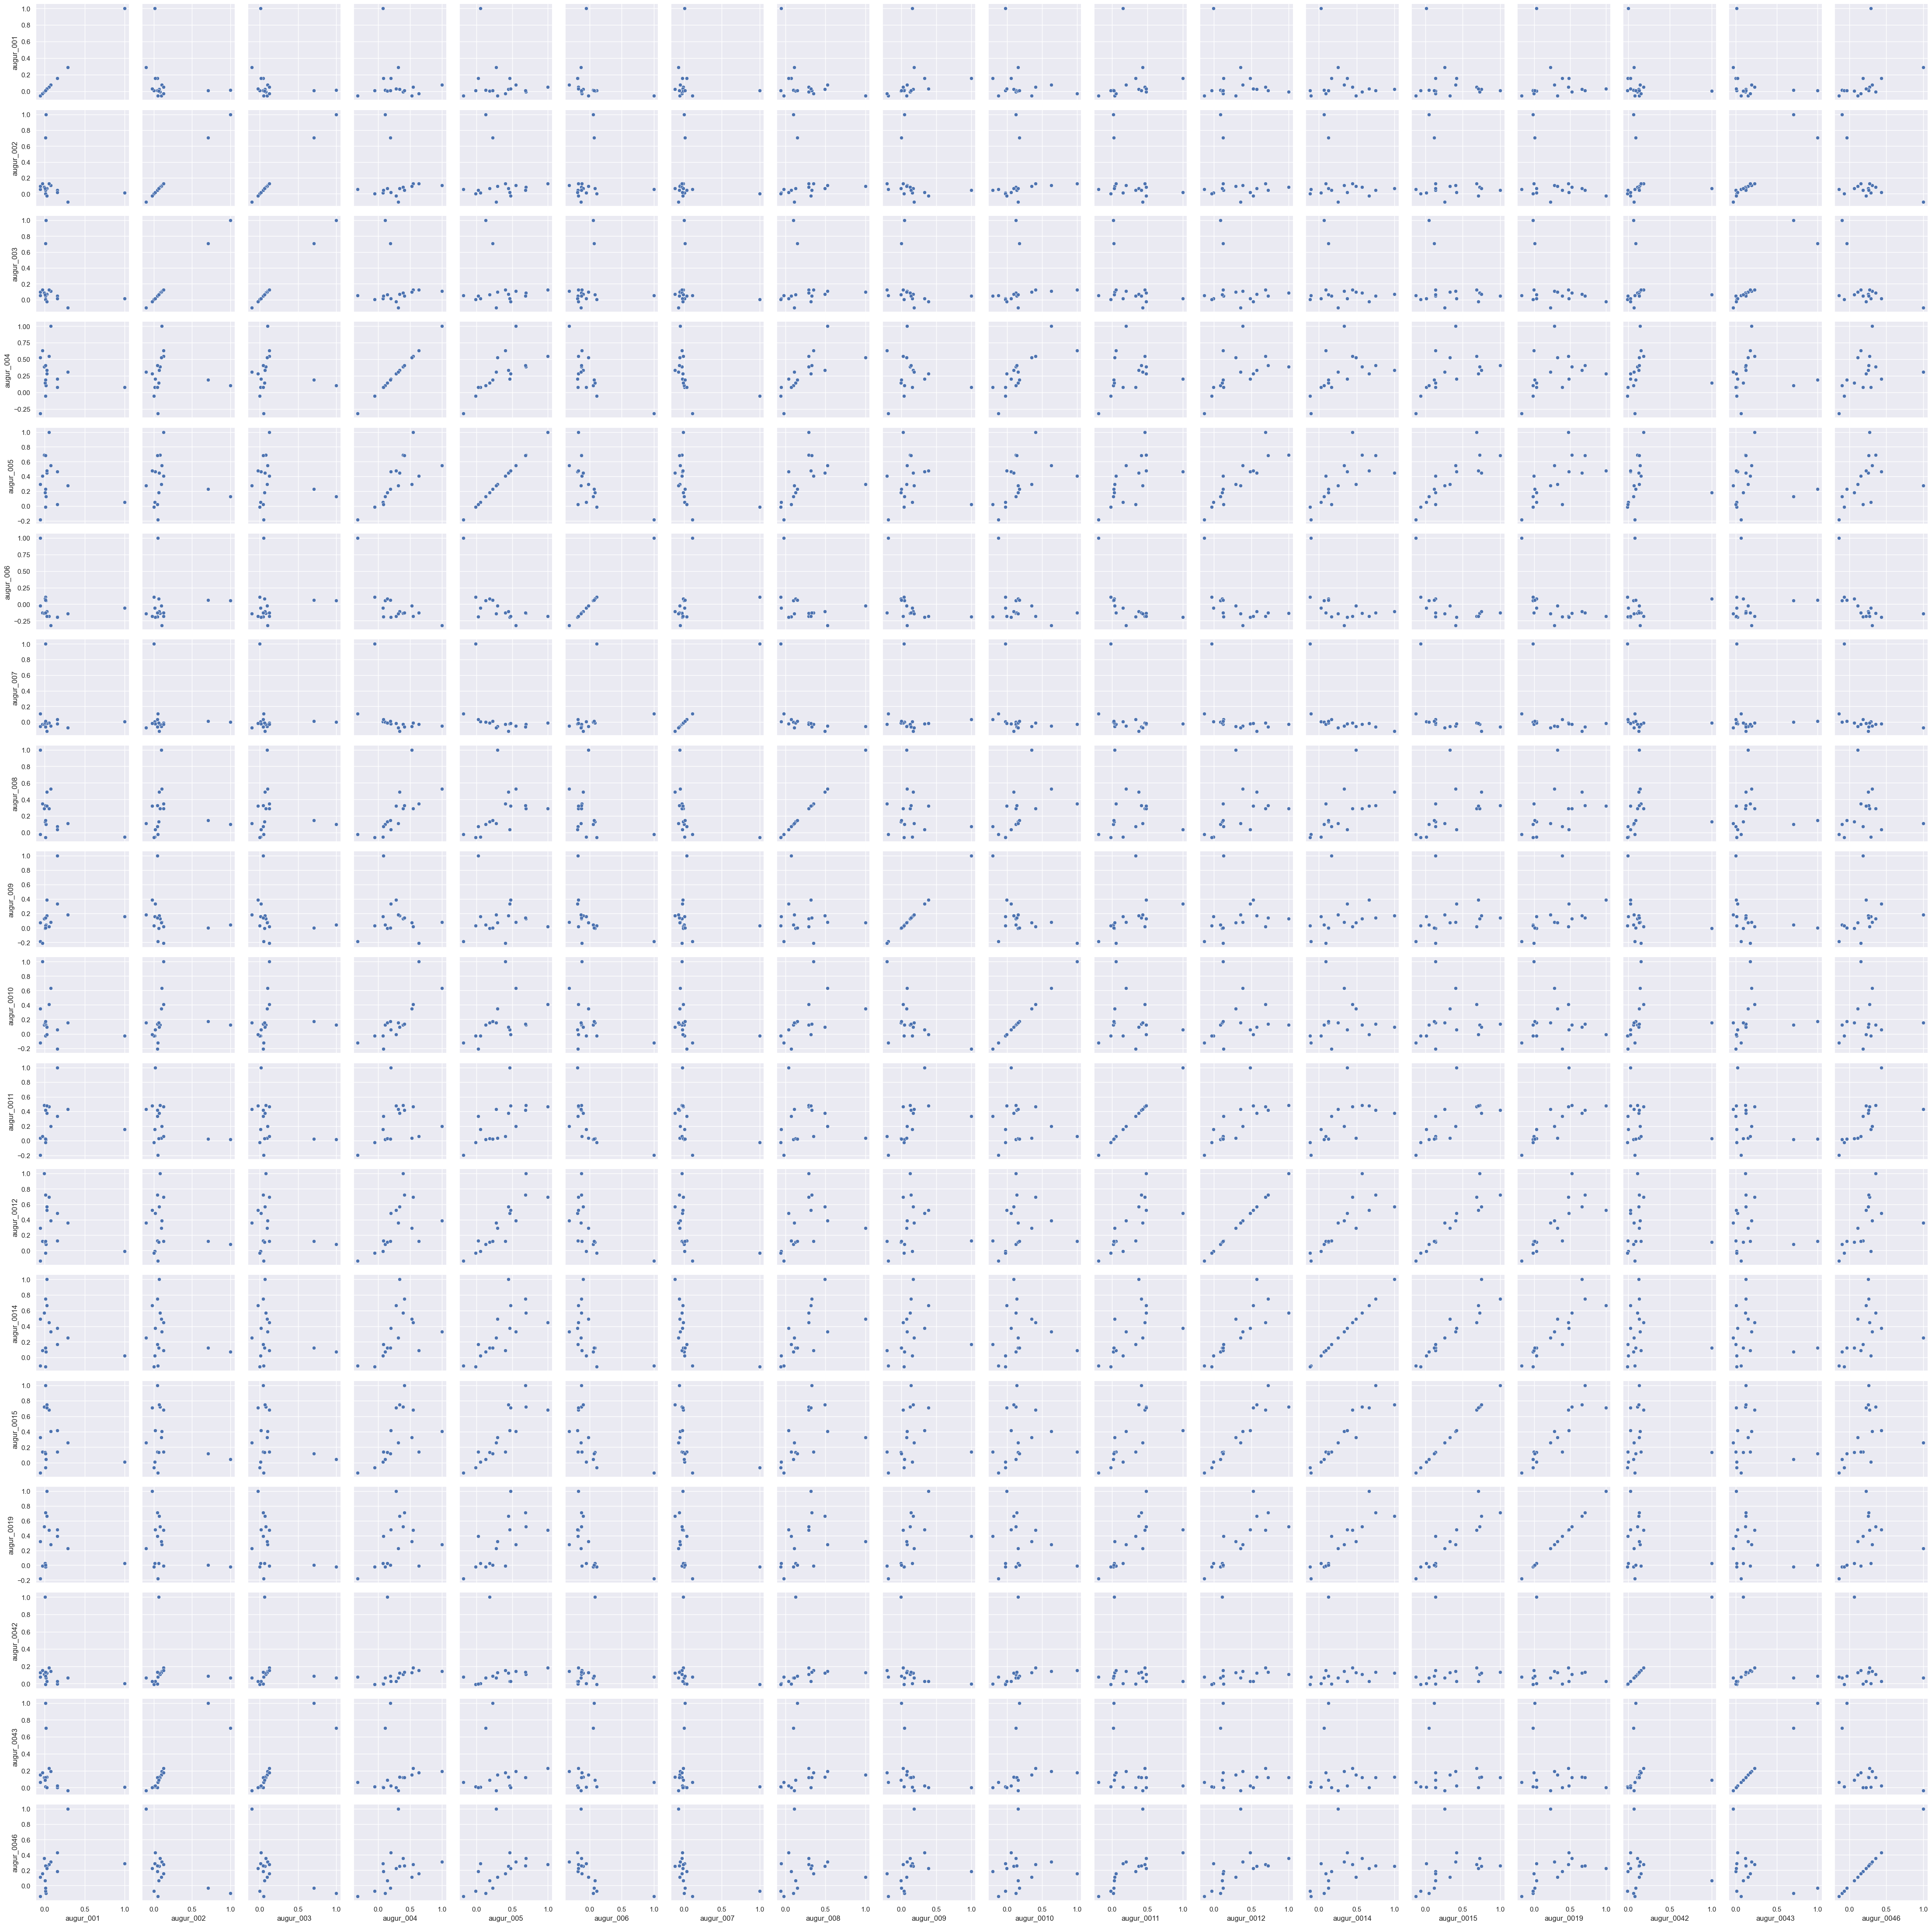

In [8]:
g=sns.PairGrid(corr)
g=g.map(sns.scatterplot)

# 组合单因子

## 数据准备

### 因子跟踪对象

In [8]:
# calculate training target
y = dl.price(data)

# select date: same as factor's date
y = utils.select_date(y, list(factor_date)[0], list(factor_date)[-1])

# combination
y = pd.DataFrame({'date': factor_date,
                   'ret': y['y']})
y

date      ret
0   2020-02-21  5784.03
1   2020-02-24  5865.47
2   2020-02-25  5897.72
3   2020-02-26  5743.39
4   2020-02-27  5753.73
..         ...      ...
832 2023-07-25  6016.63
833 2023-07-26  6001.54
834 2023-07-27  5961.18
835 2023-07-28  6043.24
836 2023-07-31  6088.24

[837 rows x 2 columns]

### 筛选因子

In [9]:
train_size = 0.8
selected_col_list = cb.select(factor_combined, y, train_size, num=10)
factor_selected = factor_combined[selected_col_list]
factor_selected

augur_009  augur_007  augur_008  augur_001  augur_0042  augur_0043  \
0     0.795223   0.000000   1.202537   0.447214    0.712781    0.590481   
1     0.587321   0.000000   1.054304   0.408248    0.106915    0.483509   
2     0.313255   0.000000   1.047264   0.377964    0.634380    0.478431   
3     0.246737   0.000000   1.086238   0.242185    0.648014    0.258638   
4     0.857678   0.000000   0.864493  -2.087370    0.658354   -0.511247   
..         ...        ...        ...        ...         ...         ...   
832  -0.686059   0.258886   2.275926   0.729255   -1.336815    0.087743   
833   2.893959   0.258886   2.002703  -1.224115   -0.146236   -0.148410   
834   3.673512   0.258886   2.322300  -0.978726   -0.021488    2.150370   
835   3.220620   0.258886   2.242606  -0.181492    1.767150   -0.638247   
836   3.821457   0.258886   2.664950  -1.602488    0.143544   -1.174823   

     augur_0019  augur_0045  augur_0015  augur_006  
0      0.491014    1.199383    0.984961  -3.271404  
1      0.614854    1.151675    1.102556  -2.038458  
2      0.517237    1.109293    1.316811  -1.823935  
3      0.193605    1.071314    1.261900  -1.547834  
4      0.219444    1.024295    1.142449   0.512716  
..          ...         ...         ...        ...  
832    1.260418   -1.165022    1.242818   0.452780  
833    1.616167    5.076450    1.588235  -3.975687  
834    1.343423    4.499727    1.514603  -2.667425  
835    1.207468    3.817508    1.110337  -0.141603  
836    1.320136    3.822951    1.345361  -0.443497  

[837 rows x 10 columns]

## 开始组合

In [10]:
CombineEngine = cb.LinearCombine(factor_selected.shape[1])
weight, new_factor = CombineEngine.train_new_expr(y, factor_selected, train_size)
new_factor = pd.DataFrame({'date': factor_date,
                           'factor': new_factor})
new_factor

Iteration times: 1204


date    factor
0   2020-02-21 -0.211886
1   2020-02-24 -0.020727
2   2020-02-25 -0.007286
3   2020-02-26  0.009310
4   2020-02-27  0.524914
..         ...       ...
832 2023-07-25  0.115109
833 2023-07-26  0.396892
834 2023-07-27  0.918213
835 2023-07-28  0.920589
836 2023-07-31  1.035492

[837 rows x 2 columns]

## 保存权重值

In [11]:
pd.DataFrame(weight).to_csv(Weights_Save_Path +
          Weight_Save_Name, encoding="utf_8_sig", index=False)
weight

array([ 1.50555344e-01, -9.16745556e-03,  5.22353926e-02, -5.94525751e-02,
        6.33870168e-05,  9.26138548e-02,  2.06146094e-02,  7.12141995e-02,
        8.88070407e-02,  1.85112293e-01])

# 评估

## 因子特性分析

<Figure size 1000x500 with 0 Axes>

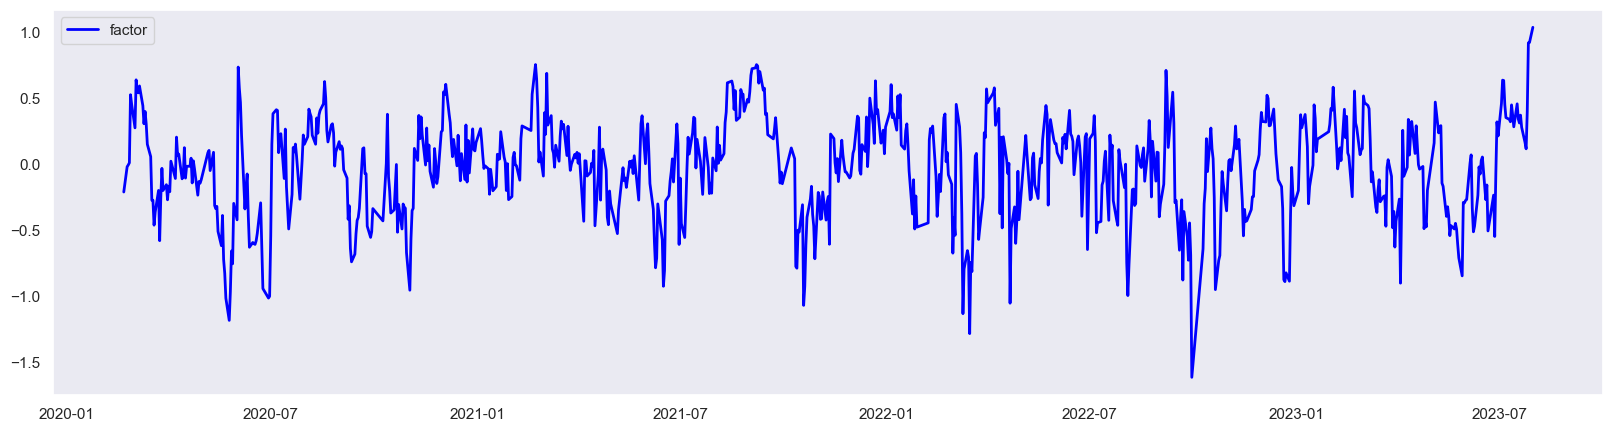

<Figure size 1000x500 with 0 Axes>

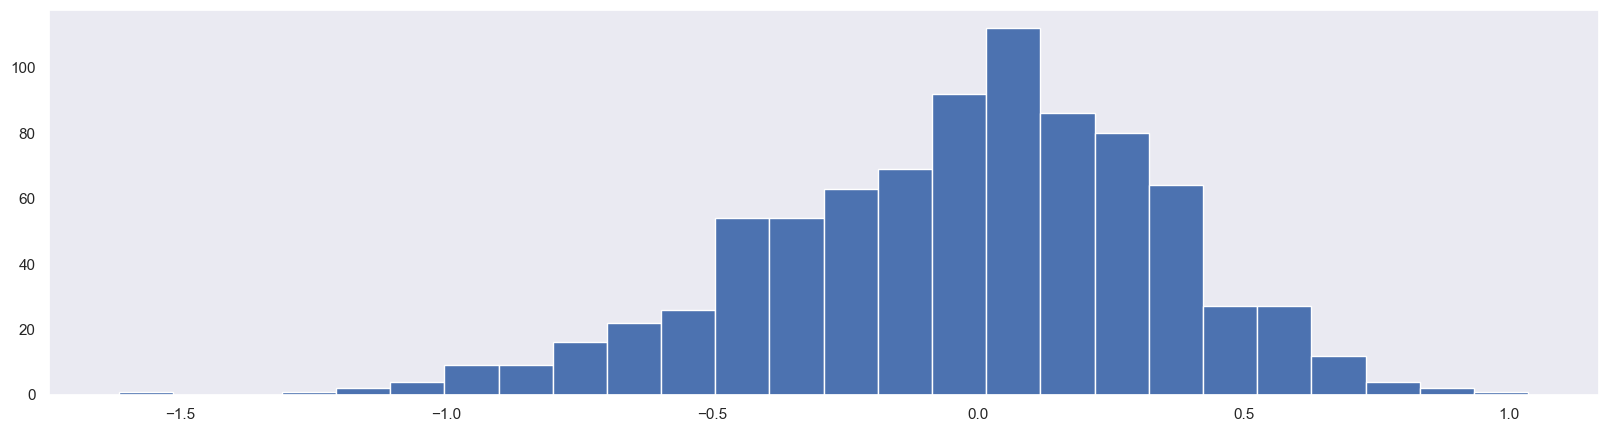

In [12]:
evaluate.plt.rcParams["figure.figsize"] = (10, 5)
evaluate.distribution(new_factor)

--- K-S Test Results ---
Statistic: 0.0574
p value: 0.0077


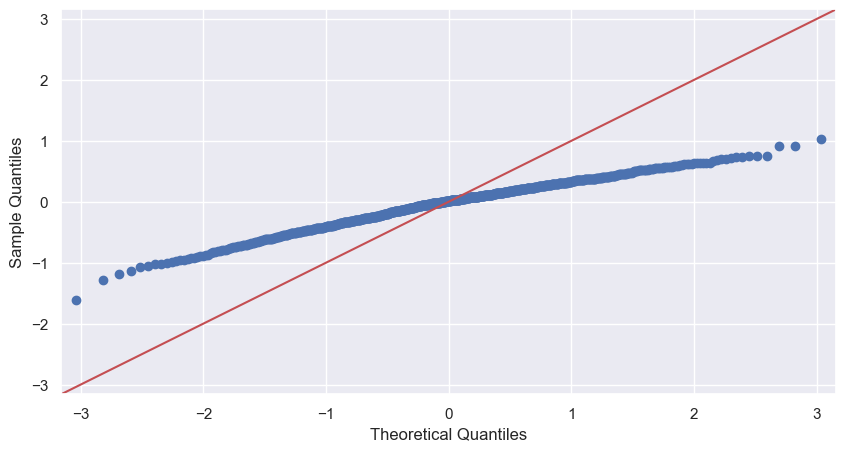

In [13]:
result = evaluate.if_normal(new_factor, plot=True)

<Figure size 1000x500 with 0 Axes>

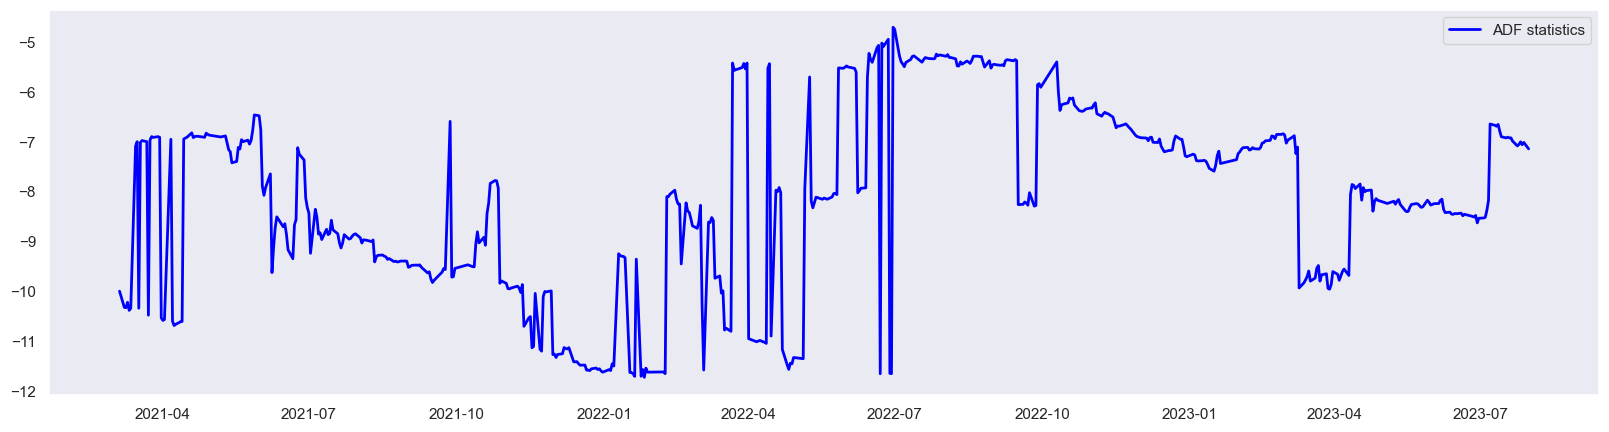

<Figure size 1000x500 with 0 Axes>

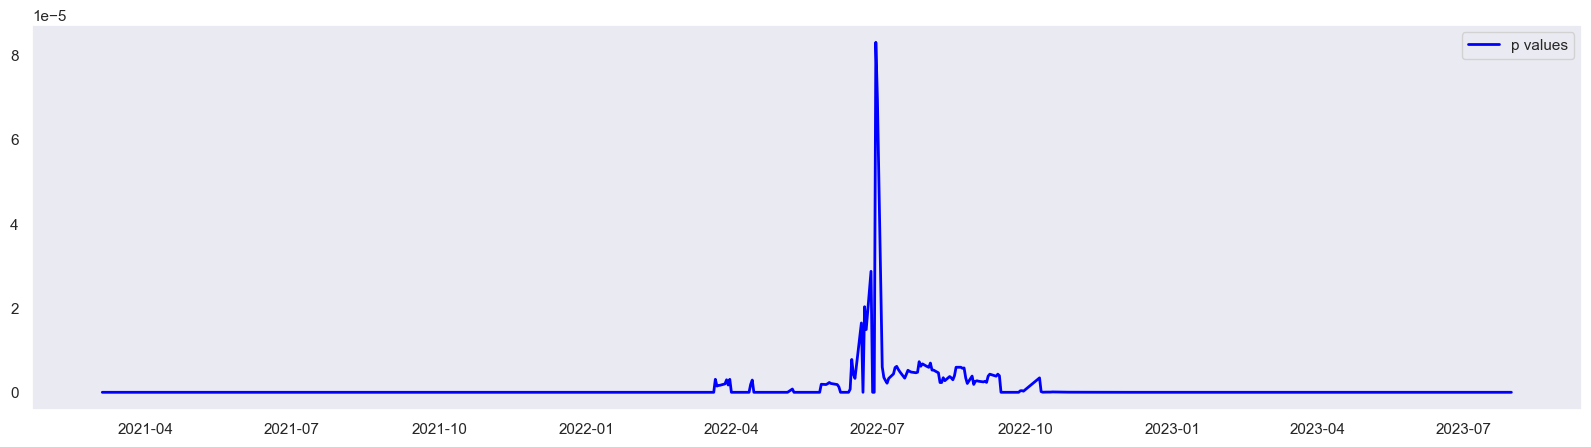

In [15]:
adf, p_value, critical_values = evaluate.adf_test(new_factor, win=252, plot=True)

## IC 检测

-0.032024078642214154

<Figure size 1000x500 with 0 Axes>

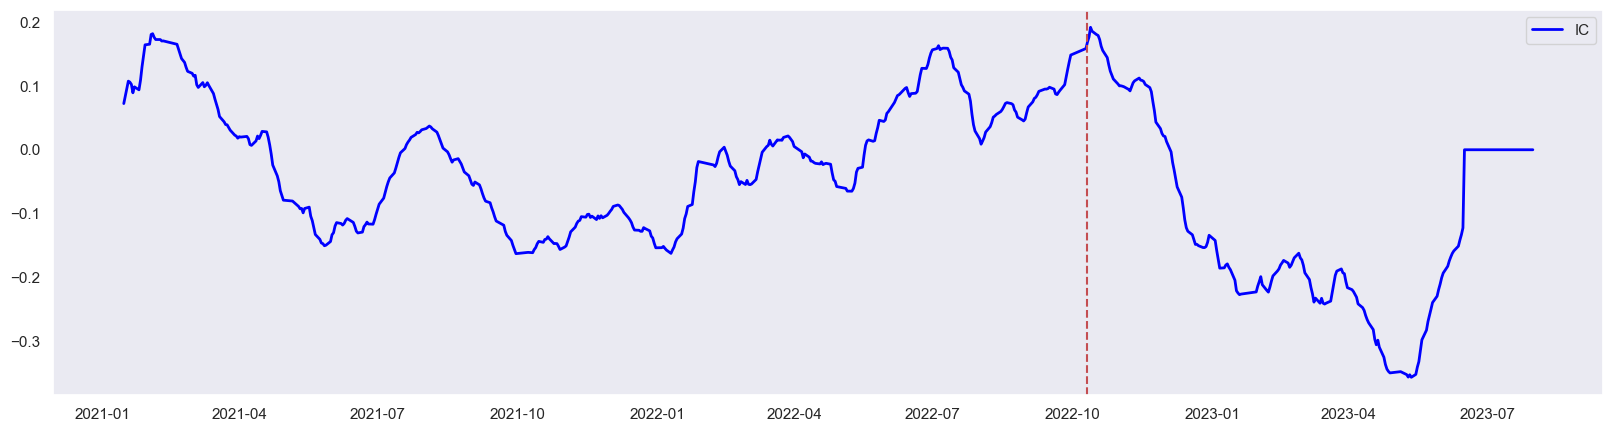

In [14]:
ic = evaluate.ic_test(data, new_factor, win = 252, plot=True, train_length = int(len(new_factor)*train_size)) # 计算IC统计量
ic.mean()

## 因果分析

c:\Users\zhaoxw\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


<Figure size 1000x500 with 0 Axes>

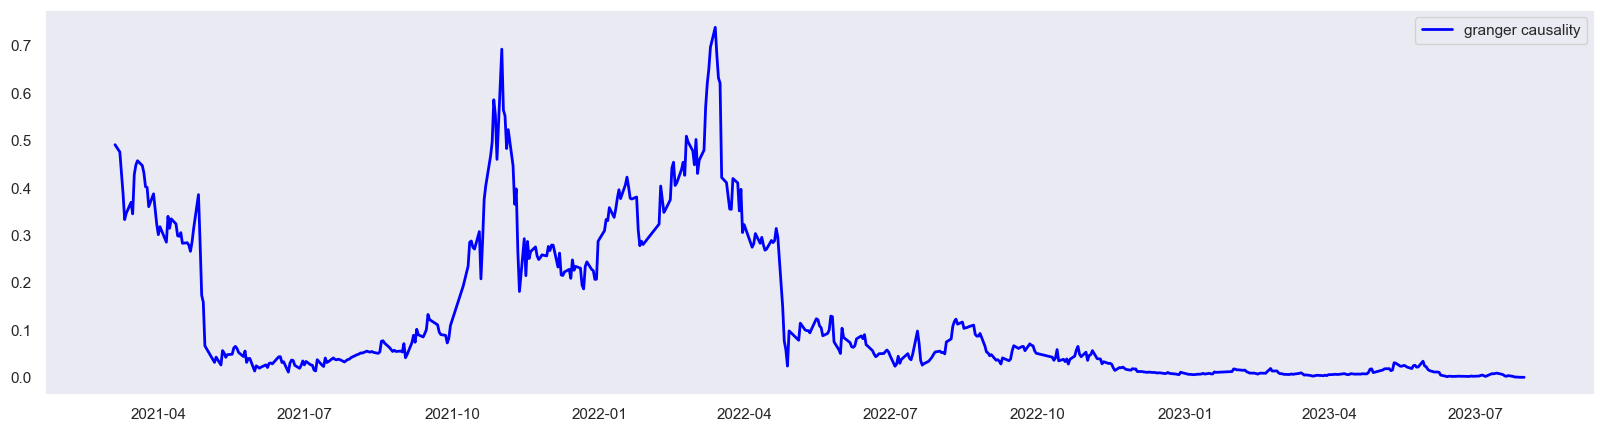

In [15]:
result = evaluate.grangers_causation_matrix(data, new_factor, test='ssr_chi2test', maxlag=15, win=252, plot=True)

## 因子回测

In [18]:
bound = evaluate.cal_bound(new_factor, switch='constant', train_size=train_size)

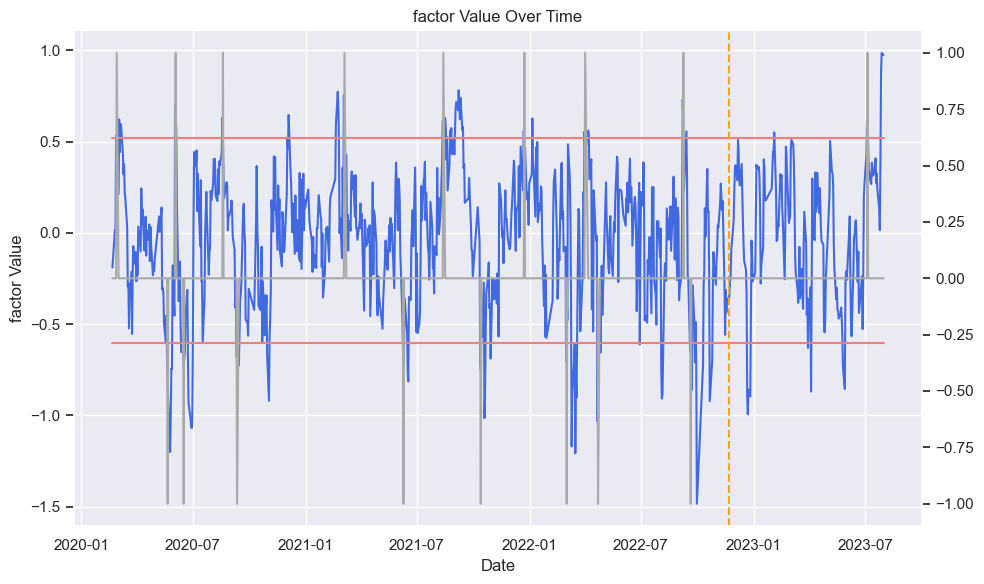

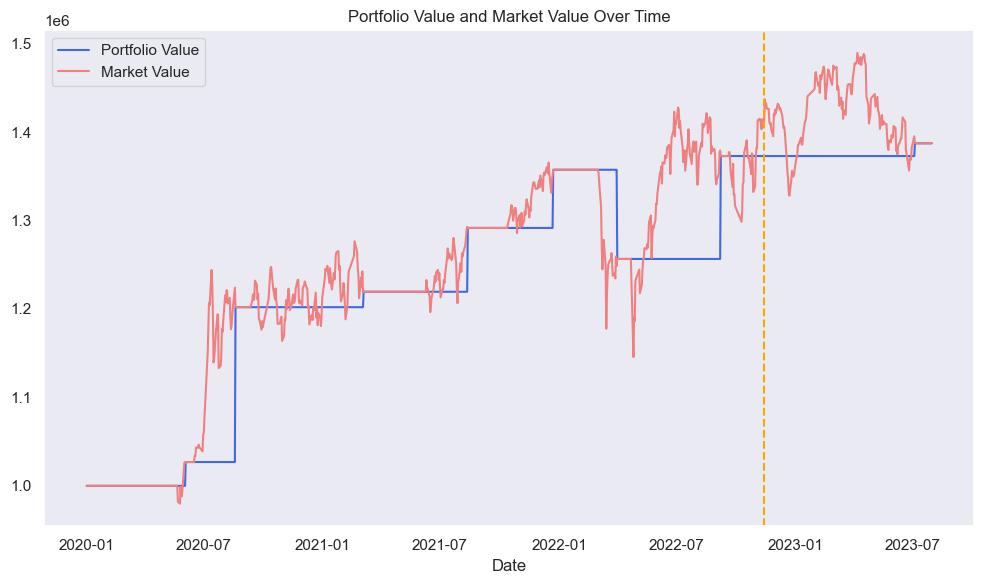

--- Portfolio Summary ---
Cash: 1387305.0109316064
Positions:
000905: 0.0
--- Performance Metrics ---
Total Returns: 38.73%
Annualized Returns: 9.98%
Volatility: 12.08%
Sharpe Ratio: 0.66
Total P&L: 108.31
Average Trade Return: 0.93%
Win Ratio: 80.00%


In [19]:
# sell signal: -1, buy signal: 1
annual_ret = evaluate.backtest_main(data, new_factor, bound, upperbound = 'sell', plot=True, train_size=train_size)

## 分层分析

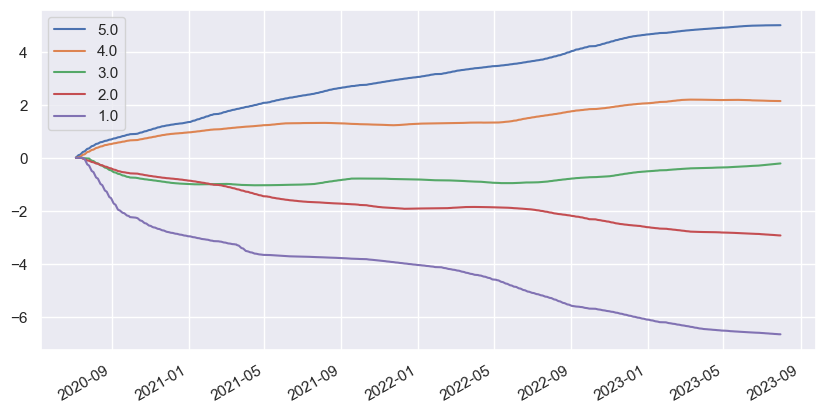

In [20]:
engine = evaluate.LayeredBacktestingEngine(data, new_factor, window=90, n_group=5, ret_period=1)
cret_group = engine.cal_roll_res_list()
cret_group.plot.line()
evaluate.plt.show()